In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('sample_labels.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('images', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)

Scans found: 5606 , Total Headers 5606


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
1610,00008381_003.png,No Finding,3,8381,54,M,AP,2500,2048,0.168,0.168,images\00008381_003.png
444,00002360_005.png,No Finding,5,2360,39,F,PA,2754,2991,0.143,0.143,images\00002360_005.png
3948,00019486_000.png,Cardiomegaly,0,19486,49,M,PA,2992,2991,0.143,0.143,images\00019486_000.png


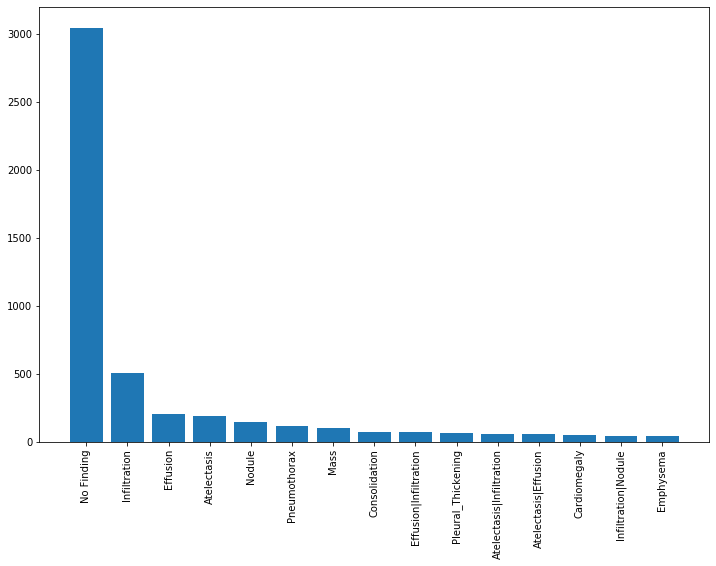

In [3]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [4]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
c_label = ""
def fn(findings):
        if c_label in findings:
            return 1.0
        else:
            return 0
        
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(fn)
all_xray_df.head(3)
    

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,57,M,AP,2500,2048,0.168,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,,1,17,77,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
MIN_CASES = 2
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (14) [('Atelectasis', 508), ('Cardiomegaly', 141), ('Consolidation', 226), ('Edema', 118), ('Effusion', 644), ('Emphysema', 127), ('Fibrosis', 84), ('Hernia', 13), ('Infiltration', 967), ('Mass', 284), ('Nodule', 313), ('Pleural_Thickening', 176), ('Pneumonia', 62), ('Pneumothorax', 271)]


[ 9.06171959  2.51516233  4.03139493  2.10488762 11.48769176  2.2654299
  1.49839458  0.2318944  17.24937567  5.06600071  5.5833036   3.1394934
  1.1059579   4.83410631]


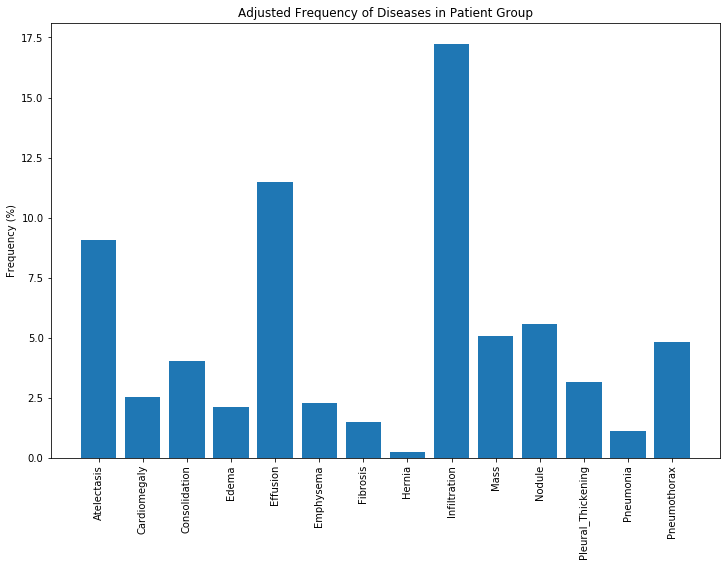

In [6]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
print(label_counts)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [7]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])


In [8]:
all_xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,57,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,00000017_001.png,,1,17,77,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.1, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])


train 5045 validation 561


In [10]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, because Keras may or maynot contain the features discussed here depending upon when you read this article, until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [11]:
datagen=ImageDataGenerator(rescale=1./255.,samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.1)
test_datagen=ImageDataGenerator(rescale=1./255.,
                              samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.1)

In [12]:
# train_df, valid_df , all_labels
train_generator = datagen.flow_from_dataframe(
train_df,
directory="images",
x_col="Image Index",
y_col= all_labels,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))

Found 5045 validated image filenames.


In [13]:
valid_generator=test_datagen.flow_from_dataframe(
valid_df,
directory="images",
x_col="Image Index",
y_col= all_labels,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))


Found 561 validated image filenames.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)       

In [16]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=1
)


Epoch 1/1
157/157 [==============================] - 252s 2s/step - loss: 0.1982 - accuracy: 0.9461 - val_loss: 0.2119 - val_accuracy: 0.9494


In [17]:
test_df = pd.read_csv('Data_Entry_2017.csv')
test_df = test_df[:4999]
test_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('imagesold', '*.png'))}
print('Scans found:', len(test_paths), ', Total Headers', test_df.shape[0])
test_df['path'] = test_df['Image Index'].map(test_paths.get)
test_df['Patient Age'] = test_df['Patient Age'].map(lambda x: int(x[:-1]))

tli = [x for x in test_df['Image Index']]
li = [x for x in test_df['Image Index'] for y in all_xray_df['Image Index'] if(x==y)]
remain = list(set(tli)-set(li))
test_df.index = test_df['Image Index']
test_df = test_df.loc[remain]

test_df['Finding Labels'] = test_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
c_label = ""
def fn(findings):
        if c_label in findings:
            return 1.0
        else:
            return 0
        
lbl = np.unique(list(chain(*test_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
lbl = [x for x in lbl if len(x)>0]
print('All Labels ({}): {}'.format(len(lbl), lbl))
for c_label in lbl:
    if len(c_label)>1: # leave out empty labels
        test_df[c_label] = test_df['Finding Labels'].map(fn)
test_df['disease_vec'] = test_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

FileNotFoundError: [Errno 2] File b'Data_Entry_2017.csv' does not exist: b'Data_Entry_2017.csv'

In [ ]:
test_df.index = range(0,4749)

In [18]:
core_idg = ImageDataGenerator(rescale = 1./255)
test_gen = core_idg.flow_from_dataframe(
test_df,
directory="imagesold",
x_col="Image Index",
y_col= all_labels,
batch_size=1,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))

Found 4749 validated image filenames.


In [19]:
# STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
# pred=model.predict_generator(test_gen,
# steps=STEP_SIZE_TEST,
# verbose=1)


In [20]:
tx , ty = next(test_gen)

In [21]:
print(ty)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
model.save('mymodel.h5')

In [25]:
tx.shape

(4000, 100, 100, 3)

In [26]:
score = model.evaluate(tx , ty  ,verbose = 0)

In [28]:
print("%s: %.2f%%" %(model.metrics_names[1] , score[1]*100))

acc: 95.19%
